In [4]:
model_name = 'Helsinki-NLP/opus-mt-ny-en'


In [5]:
from transformers import MarianMTModel, MarianTokenizer


In [6]:
# from transformers import MarianTokenizer, MarianMTModel
import tensorflow as tf

tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

In [7]:
# inputs = tokenizer(train.Text.values.tolist()[1], return_tensors="pt",max_length = 512,padding = 'max_length',truncation = True)
# outputs = model(inputs)

# last_hidden_states = outputs.last_hidden_state

In [8]:
# inputs
from tqdm import tqdm
def build_features(df):
    l = []
    for text in tqdm(df.Text.values.tolist()):
        inputs = tokenizer(text, return_tensors="pt",max_length = 512,padding = 'max_length',truncation = True)
        l.append(model.model.encoder(input_ids = inputs['input_ids']).last_hidden_state.detach().numpy())
    return(l)

In [9]:
import pandas as pd
TRAIN_FILEPATH = "../Translated/cleaned/train.csv"
TEST_FILEPATH = "../Translated/cleaned/test.csv"
SS_FILEPATH = "../data/SampleSubmission.csv"
VECTORS_FILEPATH = ""
train = pd.read_csv(TRAIN_FILEPATH)
test = pd.read_csv(TEST_FILEPATH)
ss = pd.read_csv(SS_FILEPATH)


In [10]:
# clean text 
import re
def clean_str(string):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Every dataset is lower cased except for TREC
    """
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)     
    string = re.sub(r",", " ", string) 
    string = re.sub(r"!", " ", string) 
    string = re.sub(r"\(", " ", string) 
    string = re.sub(r"\)", " ", string) 
    string = re.sub(r"\?", " ", string) 
    string = re.sub(r"\s{2,}", " ", string)   
    string = re.sub(" \d+", " ", string)
    return  string.strip().lower()
train["Text"] =train.Text.apply(lambda x: clean_str(x))
test["Text"] =test.Text.apply(lambda x: clean_str(x))

In [11]:
other_stop_w = pd.read_csv('words_shared_by_all.csv')
stopw = [item for sublist in other_stop_w.values.tolist() for item in sublist]
train['Text'].apply(lambda x: [item for item in x.split() if item not in stopw])
test['Text'].apply(lambda x: [item for item in x.split() if item not in stopw])


0      [abambo, odzikhweza, akuchuluka, kafukufuku, a...
1      [ambuye, ziyaye, ayamikira, aphunzitsi, tilito...
2      [anatcheleza, akundiopseza, gogo, wanga, akund...
3      [ulova, wafika, posauzana, adatenga, digiri, u...
4      [dzombe, kukoma, kuyambira, makedzana, panthaw...
                             ...                        
615    [kanyongolo, wapempha, oyimira, milandu, atsat...
616    [amandimenya, zikomo, gogo, ndine, mtsikana, z...
617    [apolisi, athotha, gulu, myp, asilikali, gulu,...
618    [mwambo, ukwati, chitonga, mtundu, wina, uliwo...
619    [mwapasa, autsa, mapiri, kusamvana, pakati, ap...
Name: Text, Length: 620, dtype: object

In [12]:
# test.Text

In [13]:
# arr2 = model.model.encoder(input_ids = inputs['input_ids']).last_hidden_state.detach().numpy()
# np.pad(arr,np.zeros(512))
# arr2.shape
# np.vstack((arr.reshape((1,512*512)),arr2.reshape((1,512*512)))).shape

l = build_features(train)

100%|██████████████████████████████████████████████████████████████████████████████| 1436/1436 [12:42<00:00,  1.88it/s]


In [14]:
# import pandas as pd
l2 = build_features(test)

100%|████████████████████████████████████████████████████████████████████████████████| 620/620 [05:33<00:00,  1.86it/s]


In [16]:
import numpy as np
train_text = np.concatenate(l)
test_text = np.concatenate(l2)

In [22]:
all_text = np.concatenate((l,l2),axis = 0).reshape((2056,512*512))

<function matplotlib.pyplot.show(*args, **kw)>

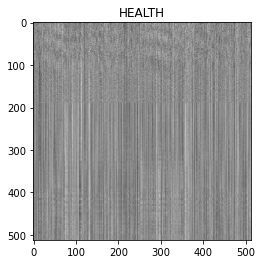

In [24]:
# train_text.min()
i=2
import matplotlib.pyplot as plt
plt.imshow(train_text[i],cmap = 'gray')
plt.title(train['Label'][i])
plt.show

In [28]:
np.corrcoef(train_text[0], train_text[1]).shape

(1024, 1024)

In [37]:
flat = train_text.reshape(1436,512*512)

In [23]:
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components = 0.99)

In [25]:
reduced = pca.fit_transform(all_text)
reduced.shape

(2056, 1957)

In [34]:
# (all_text[:1436] == train_text.reshape((1436,512*512))).all()
# len(l)
train_reduced = reduced[:1436]
test_reduced = reduced[1436:]

In [36]:
test_reduced.shape

(620, 1957)

In [49]:
reduced_train = reduced.copy()
reduced_test = pca.transform(test_text.reshape(620,512*512))

In [13]:
# tokenizer = MarianTokenizer.from_pretrained(model_name)
# model = MarianMTModel.from_pretrained(model_name, output_loading_info=False)
        
# batch2 = tokenizer.prepare_seq2seq_batch(train.Text.values.tolist()[0],
#                                                max_length=500,
#                                                pad_to_max_length=True,
#                                        return_tensors = 'pt')
# translated = model.generate(**batch)

# df.loc[df['lang']==lang, 'content_english'] = 

In [51]:
reduced_test.shape

(620, 1370)

In [14]:
# # batch['input_ids']
# import numpy as np
# # (np.array((tokenizer.encode(train.Text.values.tolist()[0],max_length = 500)))==batch['input_ids'][0].numpy()).all()
# # model.model.encoder.layers[:6]
# # layer1 = model.model.encoder.layers.state_dict()
# tokens = []
# for text in train.Text.values.tolist() : 
#     tokens.append(np.array((tokenizer.encode(text,max_length = 500,padding = 'max_length',truncation = True))))

In [15]:
# # train['tokens'] = tokens
# # test['tokens'] = test_tokens
# y = tf.keras.layers.ZeroPadding1D(padding=512)(arr)

In [16]:
# arr.shape

In [17]:
# type(layer1)
# train['tokens'] = tokens
# train.tokens.apply(len)
# (tokenizer.encode.__doc__)
# ((tokenizer.encode(train.Text.values.tolist(),max_length = 500,padding = 'max_length',truncation = True)))
# train
# import tensorflow as tf

# train_text = tf.keras.preprocessing.sequence.pad_sequences(
#     train.tokens, maxlen=500, dtype='int32', padding='post',
#     truncating='post'
# )
# test_text = tf.keras.preprocessing.sequence.pad_sequences(
#     train.tokens, maxlen=500, dtype='int32', padding='post',
#     truncating='post'
# )

In [18]:
# # **batch
# # output = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]
# # type(translated)
# # batch.keys()
# # batch['input_ids'][0]
# # train.Text.str.split(' ')[0][6]
# # batch2 = tokenizer.prepare_seq2seq_batch(train.Text.values.tolist()[1],
# #                                                max_length=500,
# #                                                pad_to_max_length=True,
# #                                        return_tensors = 'pt')
# # batch2
# # train.Text.values.tolist()
# test_tokens = []

# for text in test.Text.values.tolist() : 
#     test_tokens.append(np.array((tokenizer.encode(text,max_length = 500,padding = True))))


In [19]:
# train.Text.values.tolist()[1]
# test['tokens'] = test_tokens
# output
# translated.shape
# from transformers import pipeline
# pipeline('zero-shot-classification', model=model_name, tokenizer=tokenizer)

In [20]:
# test.drop(['Text'],axis = 1, inplace = True)
# train.drop(['Text'],axis = 1, inplace = True)

In [37]:
# len(train.Text[0].split())
# model.get_encoder().tie_weights()
# test
# train
# cols_target = train.Label.unique().tolist()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(train['Label'])

y_train = pd.DataFrame(y_train, columns= lb.classes_)
# y_train
cols_target = train['Label'].unique().tolist()
train_df = pd.concat([train, y_train], axis = 1)

x_train, x_val, y_train, y_val = train_test_split(train_reduced, train_df[cols_target], test_size=0.1, random_state = 0,stratify = train_df['Label'])


In [38]:
# train
# x_train = x_train.reshape(1292,512,512,1)
# x_val = x_val.reshape(144, 512, 512,1)
x_train.shape
# x_val.shape

(1292, 1957)

In [39]:
# x_train.apply(len)

In [59]:
# dir(model.train())
# type(model.get_input_embeddings())
# train_df
# x_train.shape
from tensorflow import keras
layers = keras.layers
models = keras.models
# Build the model
from keras import backend as K 

# Do some code, e.g. train and save model

K.clear_session()
seed_value= 0

# 1. Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set the `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set the `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.random.set_seed(seed_value)
base_model = models.Sequential()
base_model.add(layers.Dense(2000, input_shape=(1957,)))
# base_model.add(layers.AveragePooling2D(pool_size = 4))
# base_model.add(layers.Flatten())
# model.add(layers.BatchNormalization())
# base_model.add(layers.Activation('softmax'))
# base_model.add(layers.Dense(300))
# model.add(layers.BatchNormalization())
# base_model.add(layers.Activation('linear'))

# base_model.add(layers.Dense(1000))
base_model.add(layers.Activation('linear'))

base_model.add(layers.Dense(1000))
base_model.add(layers.Activation('linear'))

# base_model.add(layers.Dense(1000))
# base_model.add(layers.Activation('linear'))

base_model.add(layers.Dropout(0.9))
# model.add(layers.Dense(2048))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dense(512))
# # model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dense(128))
# # model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))

# model.add(layers.Dropout(drop_ratio))
base_model.add(layers.Dense(20))
base_model.add(layers.Activation('softmax'))

base_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model.add(Dense(num_classes, activation='sigmoid'))  #multi-label (k-hot encoding)
# base_model.add(layers.Dropout(0.2))
# model.add(layers.Dense(2048))
# model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dense(512))
# # model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))
# model.add(layers.Dense(128))
# # model.add(layers.BatchNormalization())
# model.add(layers.Activation('relu'))

# model.add(layers.Dropout(drop_ratio))
# model.add(layers.Dense(20))
# model.add(layers.Activation('softmax'))

# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

In [60]:
history = base_model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=30,
                    verbose=1,
                   validation_split = 0.1)

Epoch 1/30
37/37 [==============================] - 7s 198ms/step - loss: 30.2529 - accuracy: 0.1093 - val_loss: 10.5296 - val_accuracy: 0.2923
Epoch 2/30
37/37 [==============================] - 6s 172ms/step - loss: 11.9833 - accuracy: 0.5009 - val_loss: 11.9078 - val_accuracy: 0.3462
Epoch 3/30
37/37 [==============================] - 6s 157ms/step - loss: 4.3320 - accuracy: 0.7762 - val_loss: 12.6458 - val_accuracy: 0.4000
Epoch 4/30
37/37 [==============================] - 6s 170ms/step - loss: 2.7017 - accuracy: 0.8528 - val_loss: 12.5224 - val_accuracy: 0.4000
Epoch 5/30
37/37 [==============================] - 6s 162ms/step - loss: 1.6879 - accuracy: 0.9105 - val_loss: 14.0575 - val_accuracy: 0.4385
Epoch 6/30
37/37 [==============================] - 7s 190ms/step - loss: 0.9912 - accuracy: 0.9398 - val_loss: 14.7729 - val_accuracy: 0.4615ccuracy: 0.
Epoch 7/30
37/37 [==============================] - 6s 158ms/step - loss: 0.9233 - accuracy: 0.9449 - val_loss: 15.1040 - val_acc

KeyboardInterrupt: 

In [61]:
# test_text.max()
import gc
gc.collect()

32

In [62]:
from sklearn.linear_model import LogisticRegression

In [86]:
lr = LogisticRegression(C = 12)

In [87]:
# dir(lr)
# lr.__doc__
# y_train
# lb.inverse_transform(y_train.values)
# y_train.index)
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
Le.fit(train['Label'])

y_train_1 = Le.transform(train.loc[y_train.index.tolist(),'Label'].values)
y_val_1 = Le.transform(train.loc[y_val.index.tolist(),'Label'].values)

In [88]:
lr.fit(x_train,y_train_1)

C:\Users\amakr\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=12)

In [89]:
# dir(lr)
lr.score(x_val,y_val_1)

0.4930555555555556

In [93]:
# from sklearn.naive_bayes import ComplementNB
# CNB = ComplementNB()
# CNB.fit(x_train,y_train_1)
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train,y_train_1)

SGDClassifier()

In [94]:
sgd.score(x_val,y_val_1)

0.2847222222222222

In [95]:
from sklearn.svm import SVC 
svc = SVC()
svc.fit(x_train,y_train_1)
svc.score(x_val,y_val_1)

0.3194444444444444